Notebook getting stock information from RobinHood
Predicting stock evolution based on EchoStateNetwork

Inspired from https://towardsdatascience.com/predicting-stock-prices-with-echo-state-networks-f910809d23d4 but adding prediction to training set to compute forward looking stock price.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import robin_stocks as r

# This is the library for the Reservoir Computing got it by: https://github.com/cknd/pyESN
from pyESN import ESN 

In [ ]:
''''
Add a cell here to manage robin_stocks authentication
>>> login = r.login('joshsmith@email.com','password')

ref: https://github.com/jmfernandes/robin_stocks
''''

In [2]:
def predict_stock(stock_symbole, projection=5):
    train, test = get_stock(stock_symbole, projection)
    
    n_reservoir= 500
    sparsity=0.2
    rand_seed=23
    spectral_radius = 0.9
    noise = .01


    esn = ESN(n_inputs = 1,
          n_outputs = 1, 
          n_reservoir = n_reservoir,
          sparsity=sparsity,
          random_state=rand_seed,
          spectral_radius = spectral_radius,
          noise=noise)

    future = 1
    futureTotal=len(test)
    trainlen = len(train)
        
    pred_tot=np.zeros(futureTotal)
    
    for i in range(0,futureTotal-1,future):
        pred_training = esn.fit(np.ones(trainlen),train)
        prediction = esn.predict(np.ones(future))
        train = np.append(train, prediction)
        trainlen = len(train)
    
    real = np.append(train[:-futureTotal], test)
    projection = train[-futureTotal:]
    
    plt.figure(figsize=(16,8))
    start_index = 150
    plt.plot(range(start_index,trainlen),real[start_index:],'b',label="Historic & Projection", alpha=0.3)
    plt.plot(range(trainlen-futureTotal,trainlen),projection,'r',  alpha=0.8, label='Real price')

    lo,hi = plt.ylim()
    plt.plot([trainlen-futureTotal,trainlen-futureTotal],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

    plt.title(f'{stock_symbole} stock', fontsize=25)
    plt.xlabel(r'Time (Days)', fontsize=20,labelpad=10)
    plt.ylabel(r'Price ($)', fontsize=20,labelpad=10)
    plt.legend(fontsize='xx-large', loc='best')
    sns.despine()

In [3]:
def get_stock(stock_symbol, projection):
    f = r.stocks.get_historicals(stock_symbol, span='year')

    df = pd.DataFrame(f)
    df = df[['high_price', 'low_price']]

    df.high_price = df.high_price.astype(float)
    df.low_price = df.low_price.astype(float)
    df = (df.high_price + df.low_price)/2
    test = df[-projection-1:].to_numpy()
    train = df[:-projection].to_numpy()
    return train, test

In [4]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [ ]:
# example on DataDog stock
predict_stock('DDOG', 5)

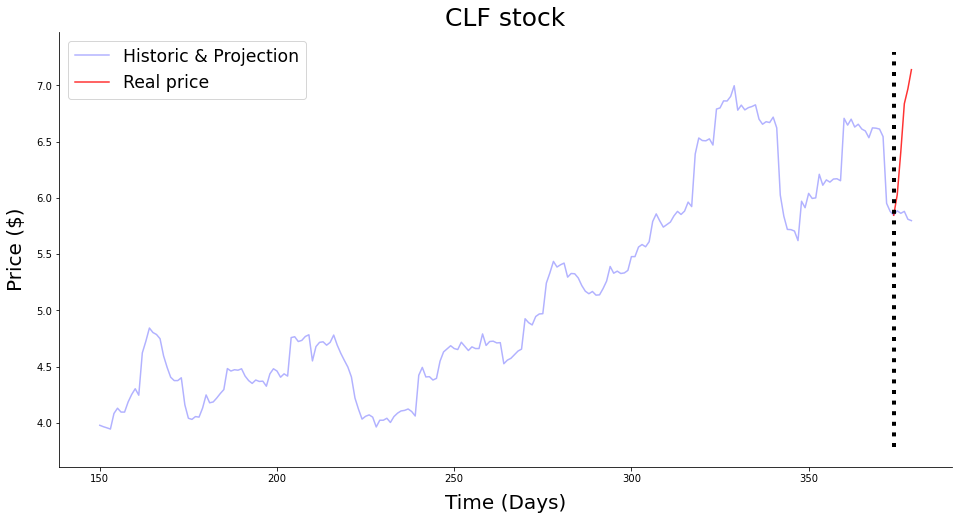

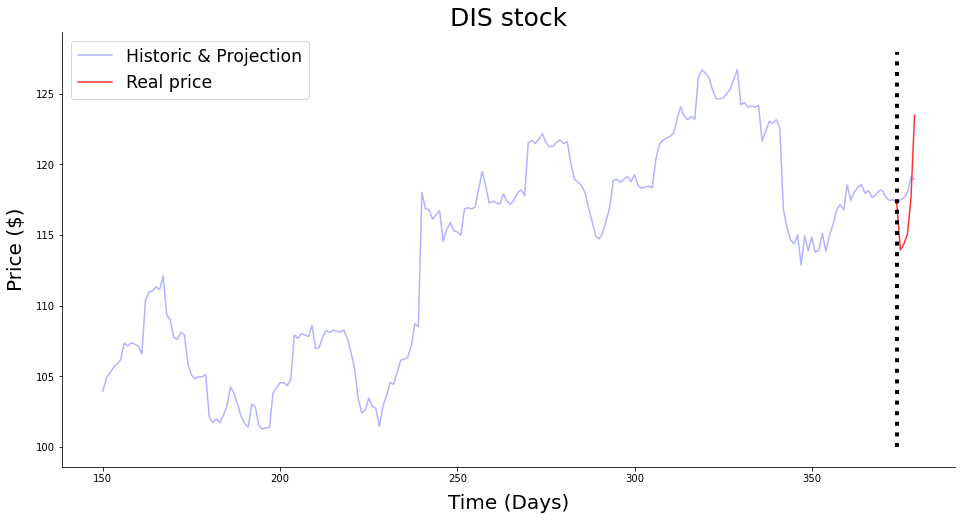

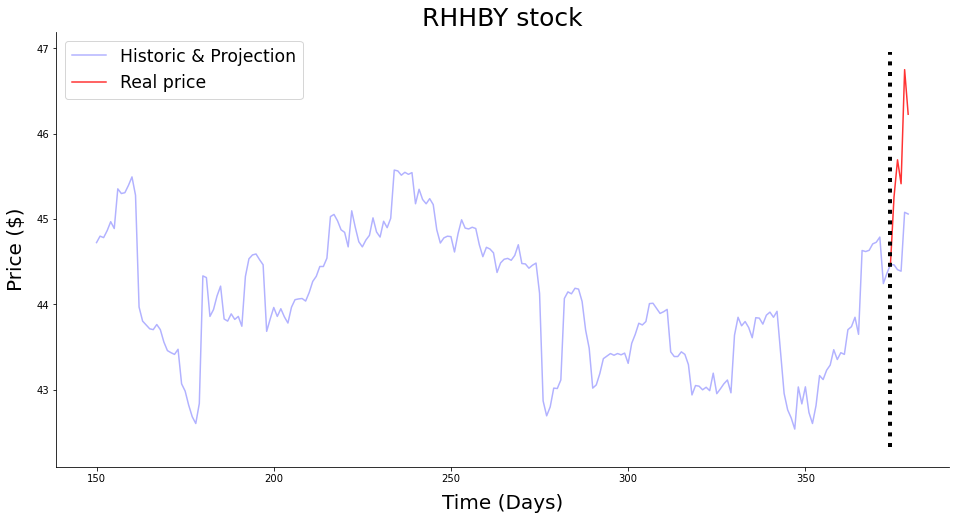

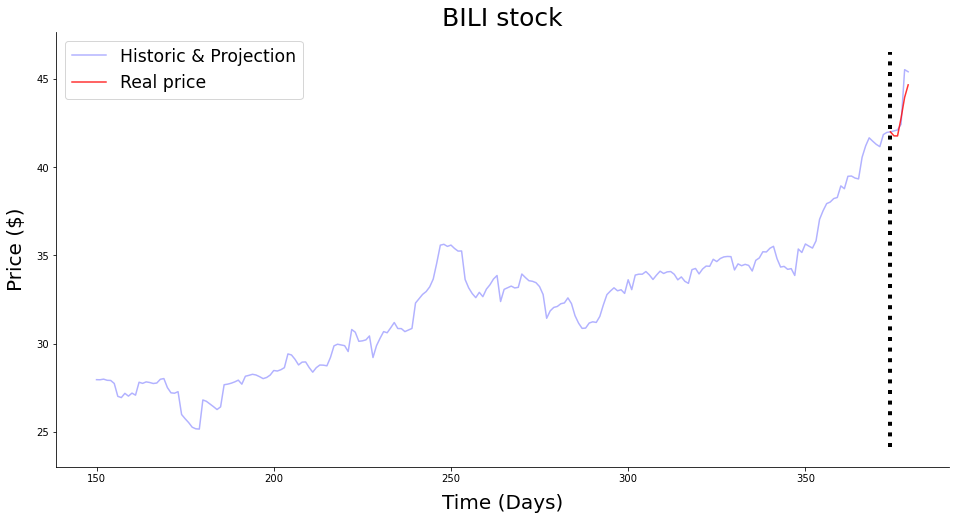

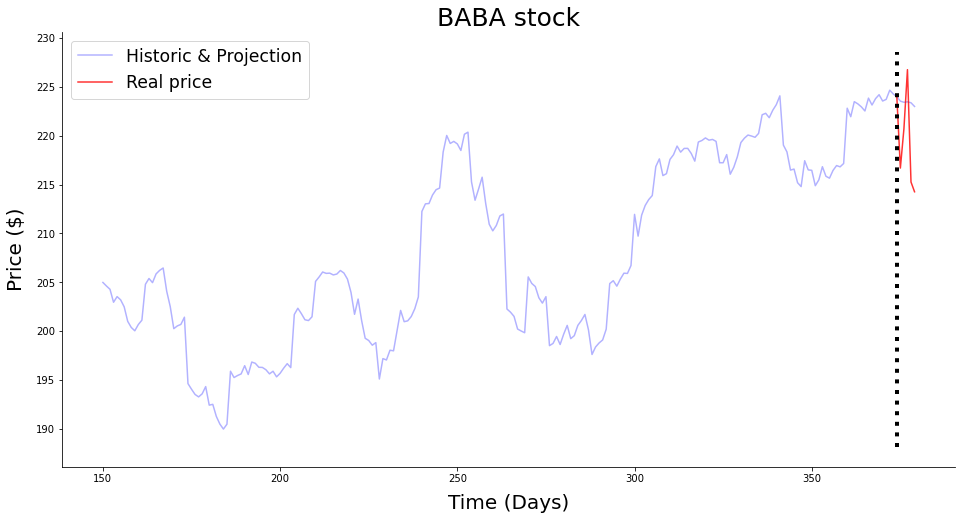

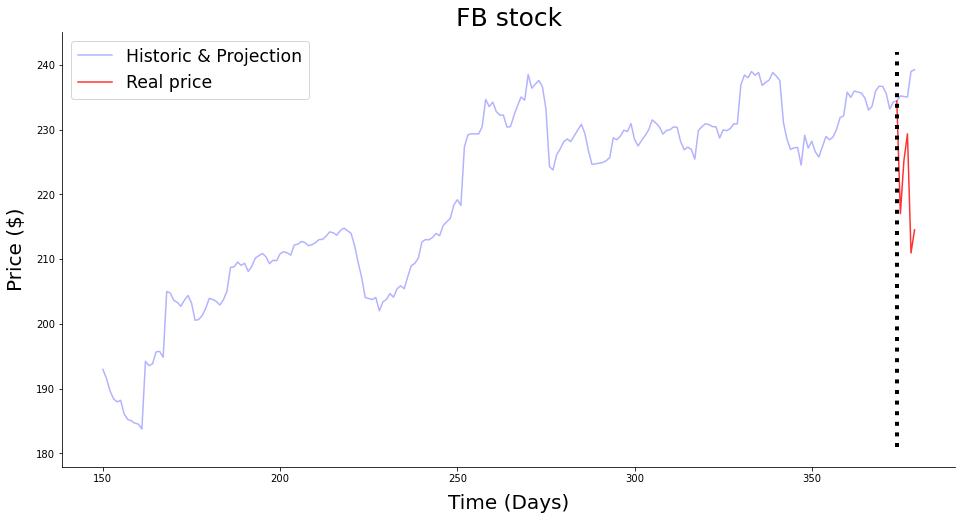

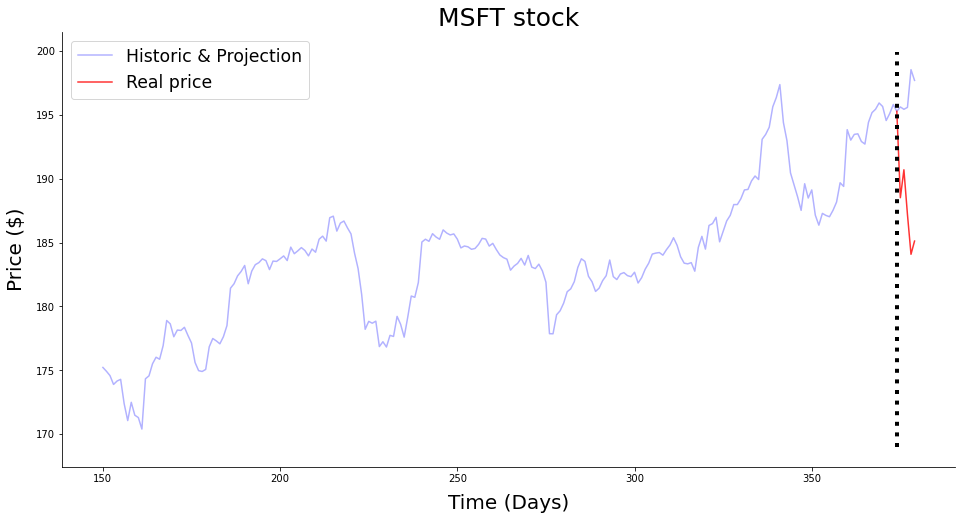

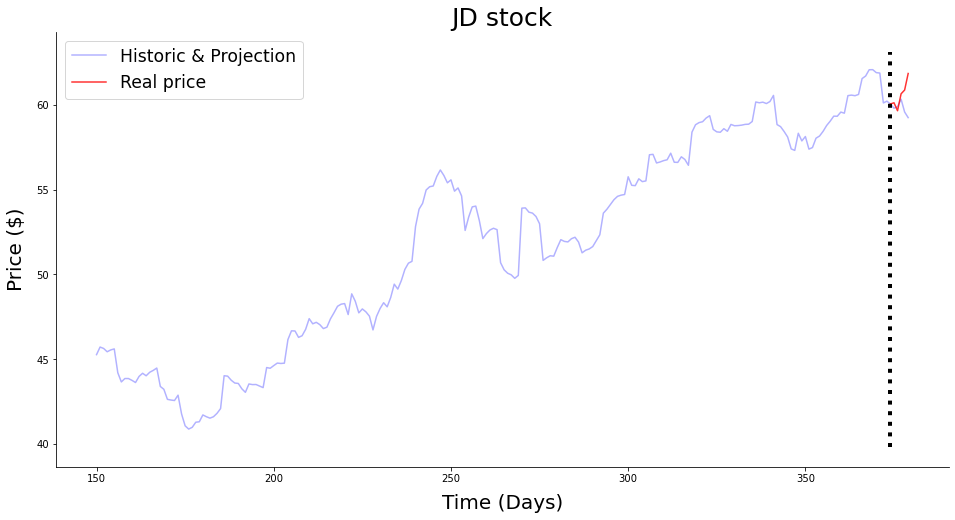

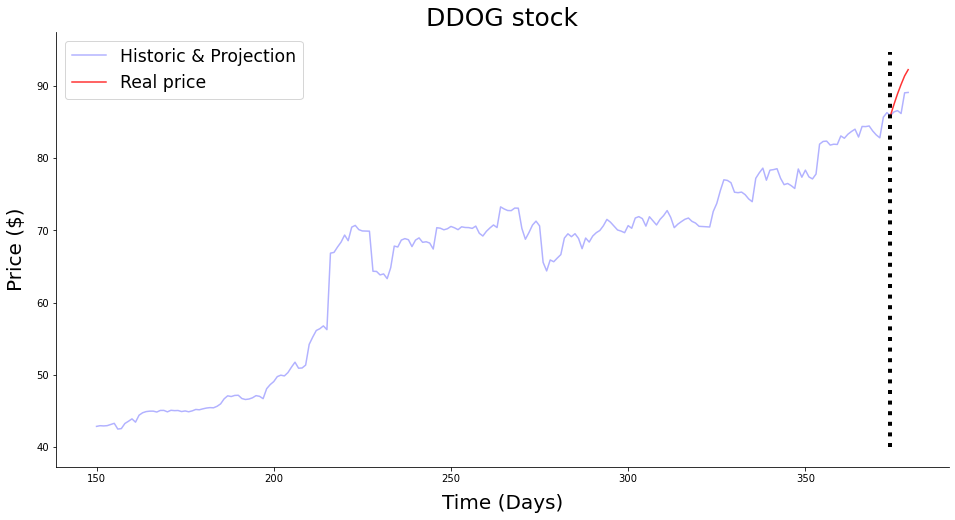

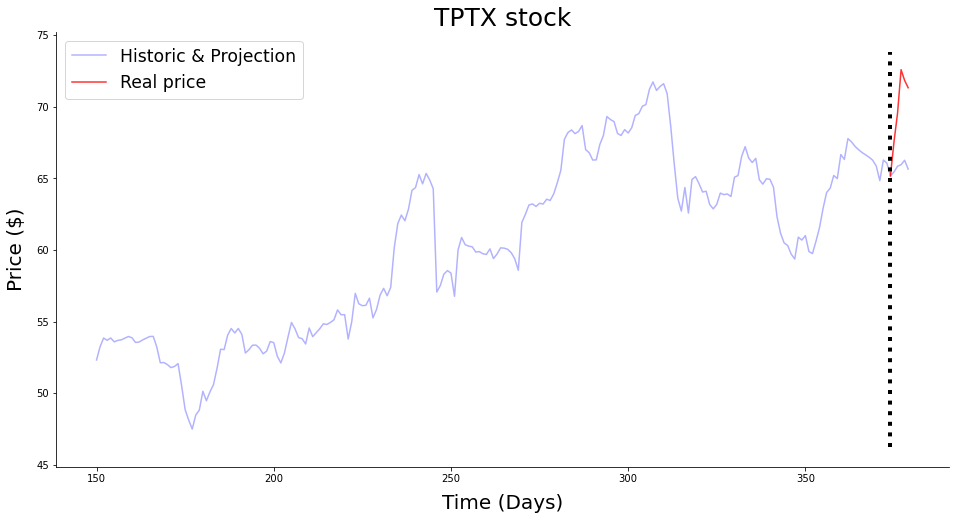

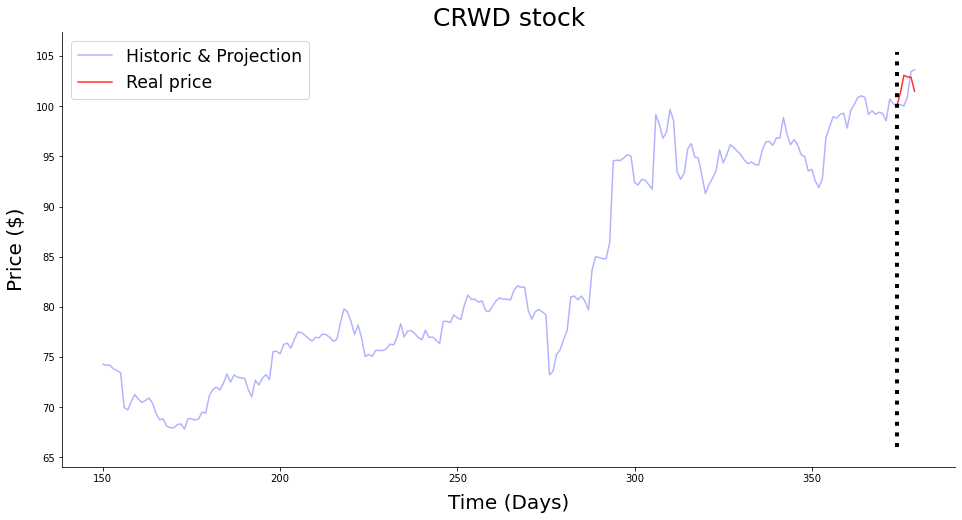

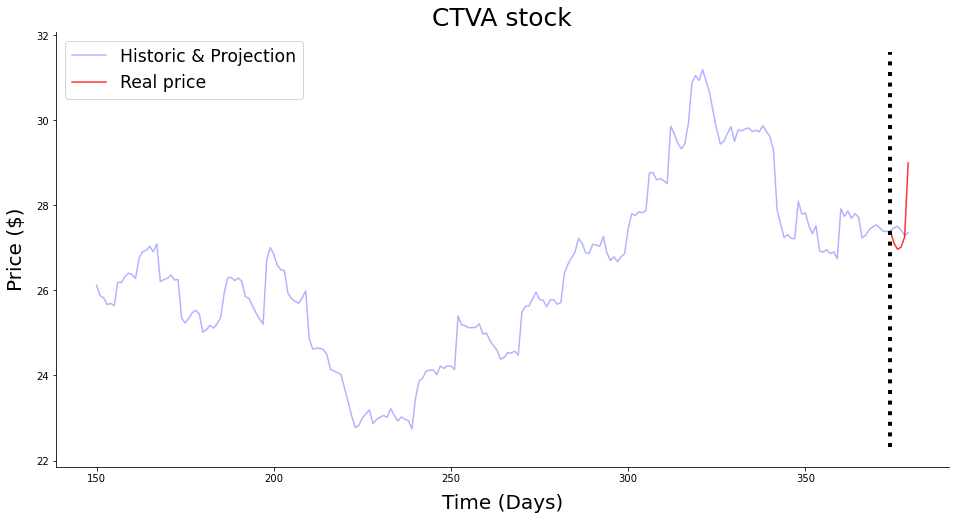

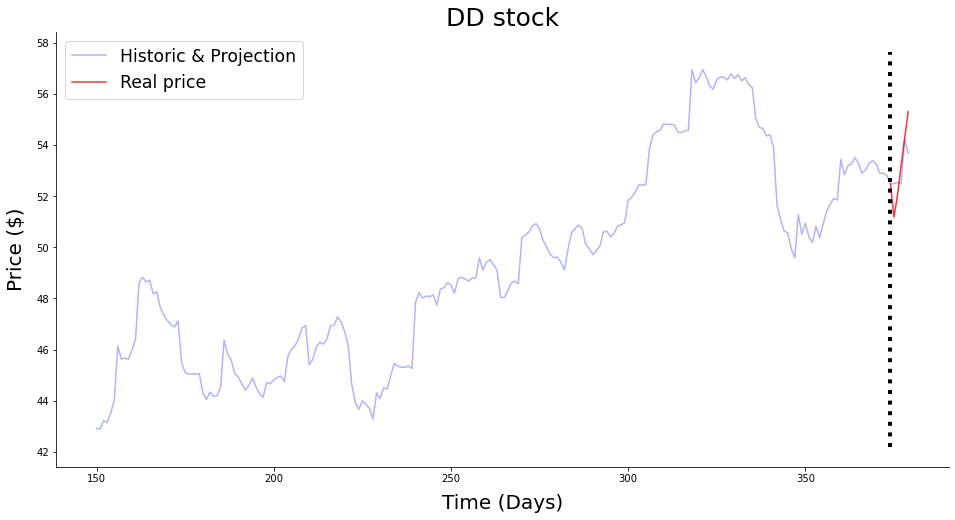

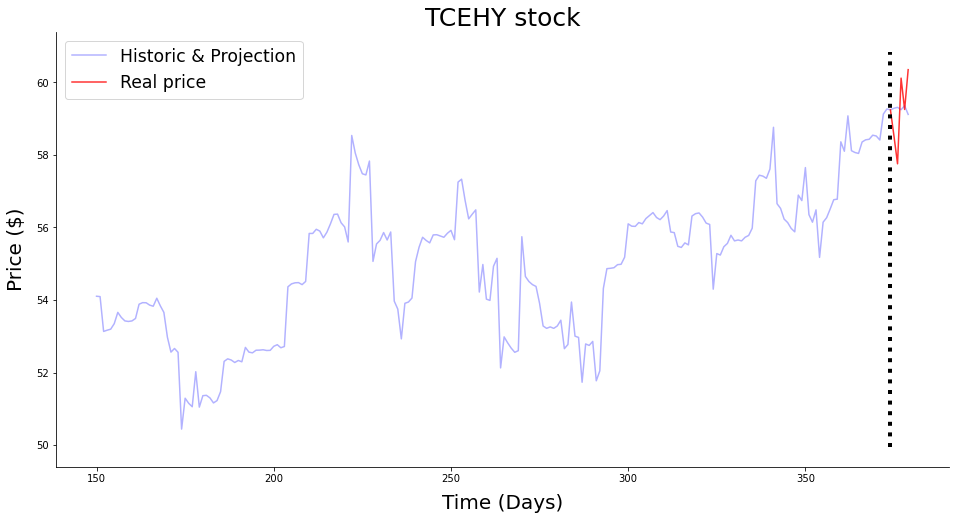

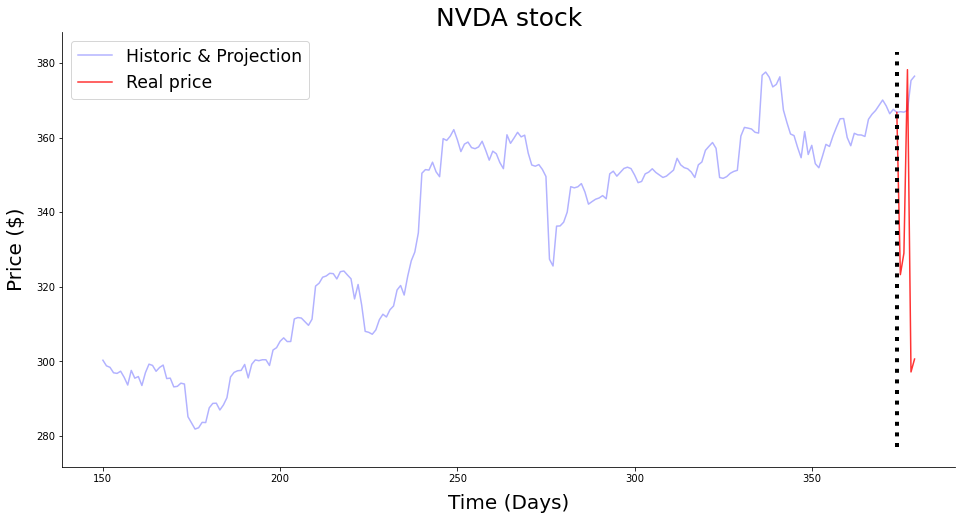

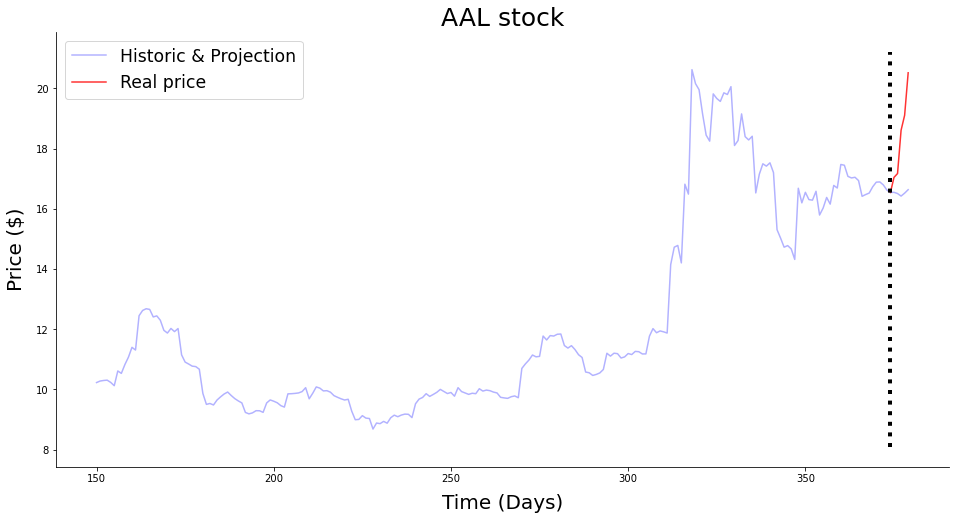

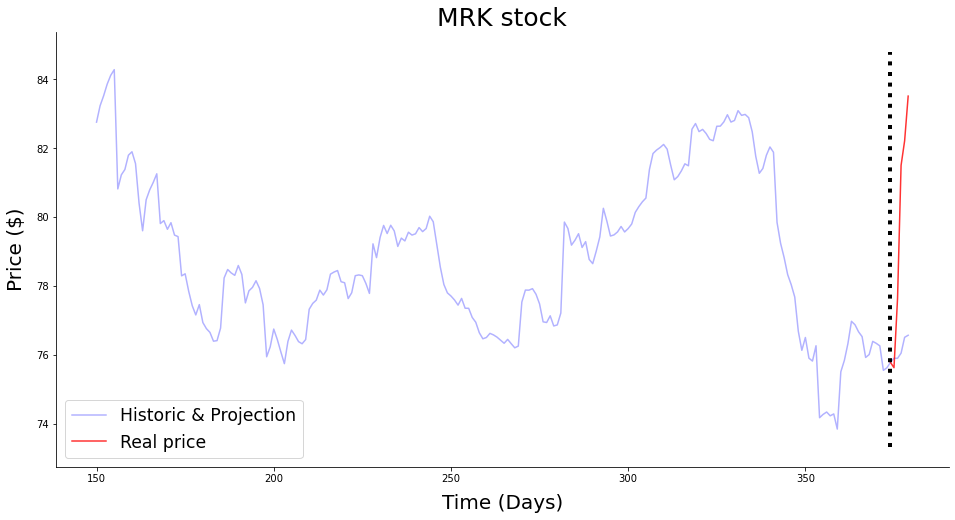

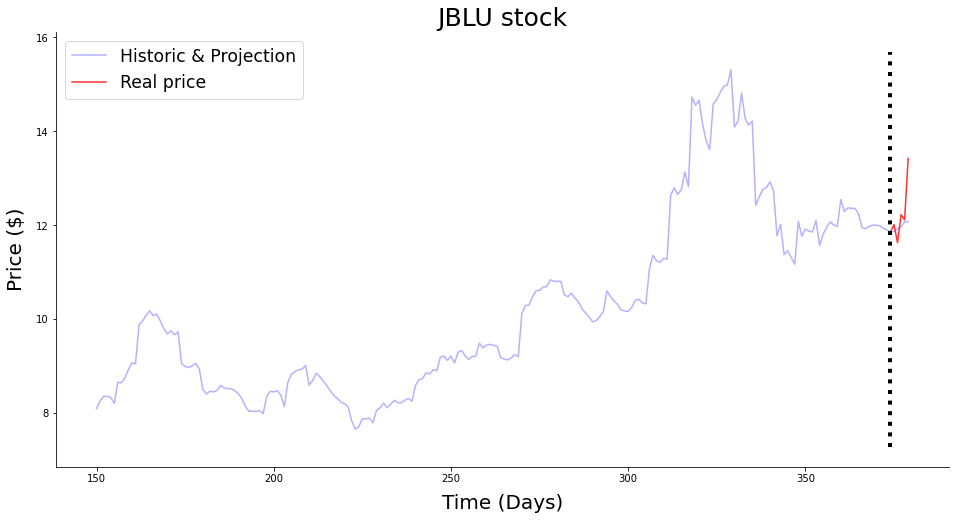

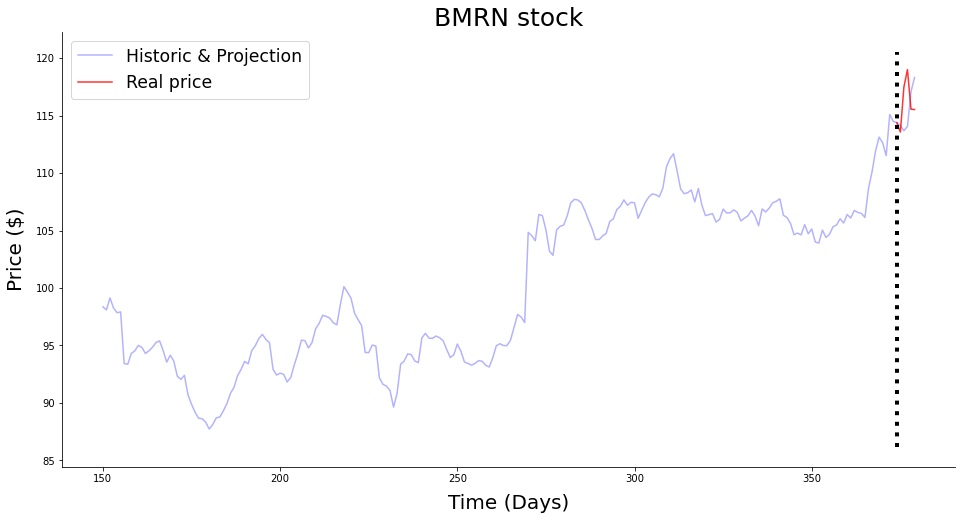

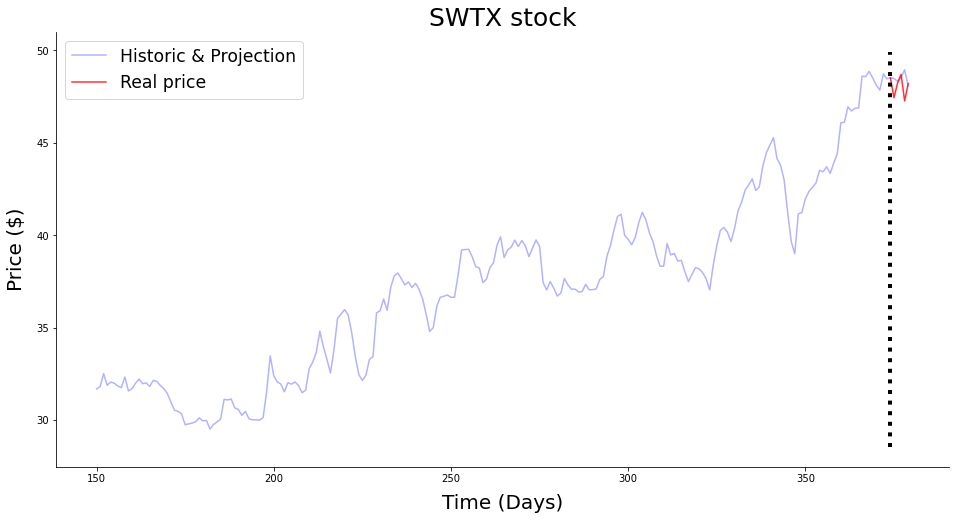

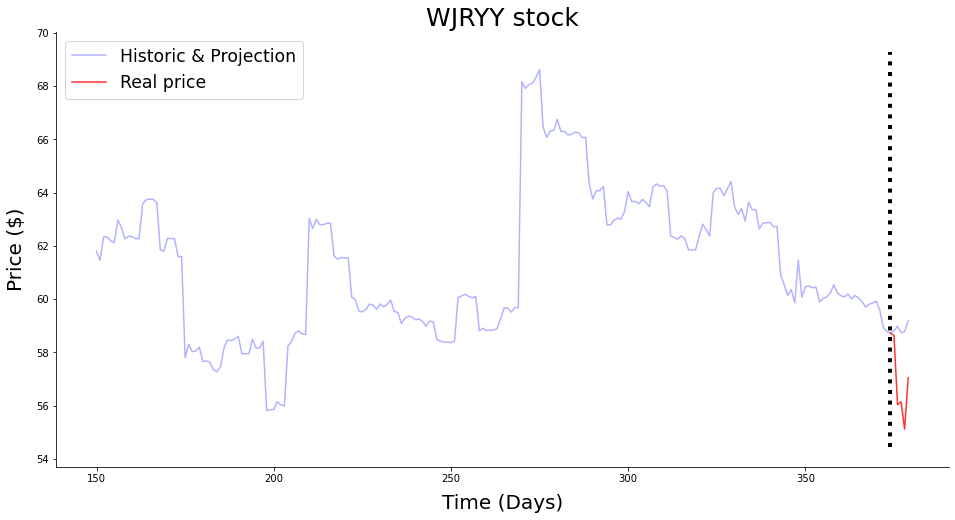

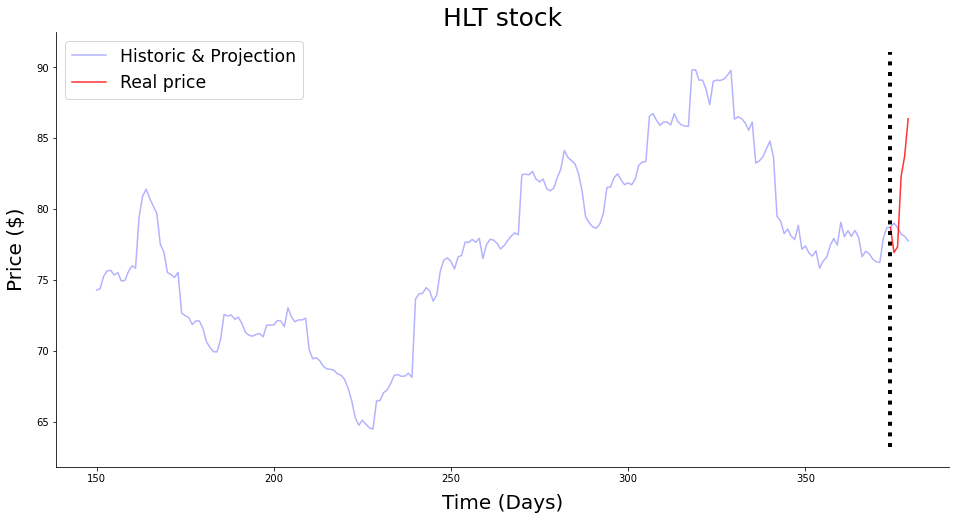

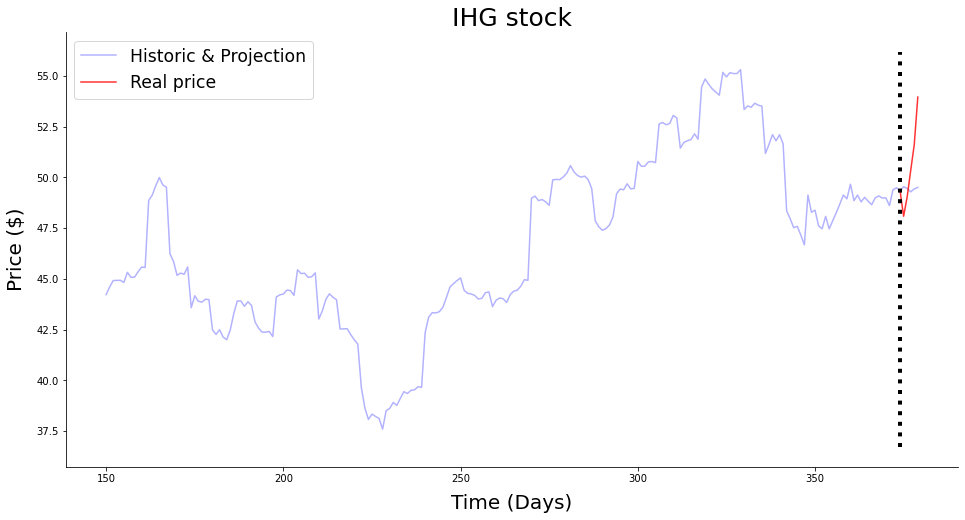

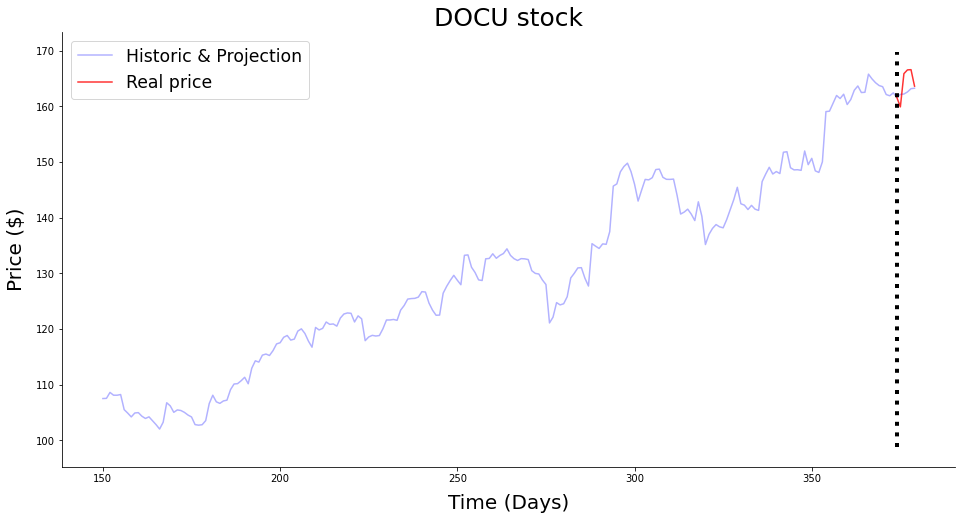

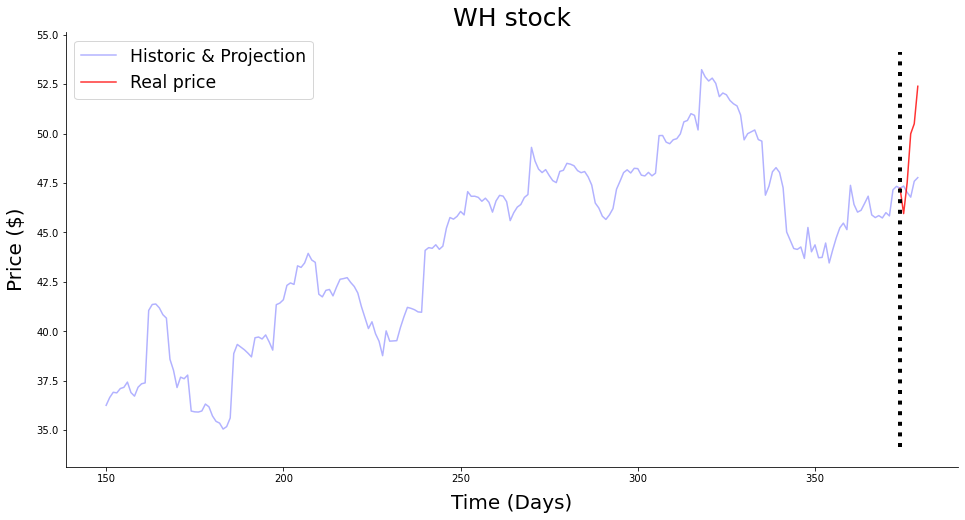

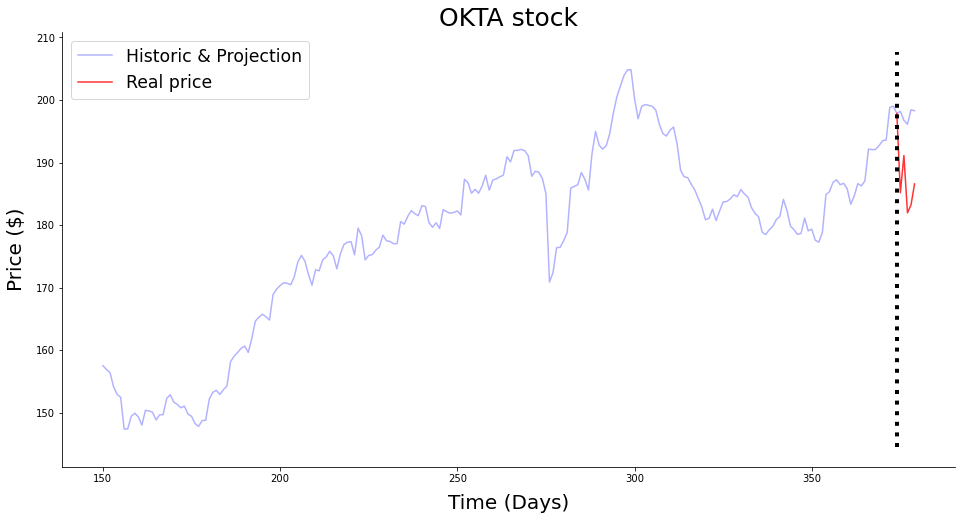

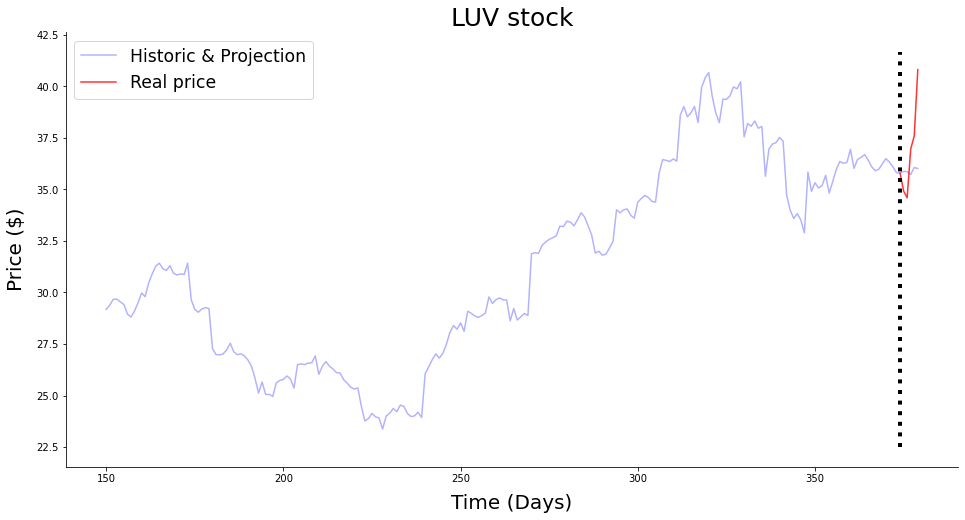

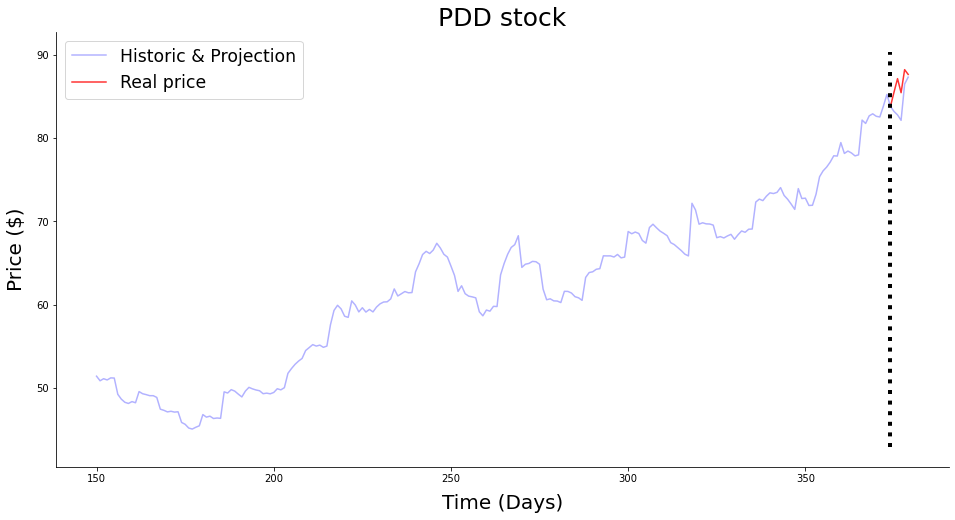

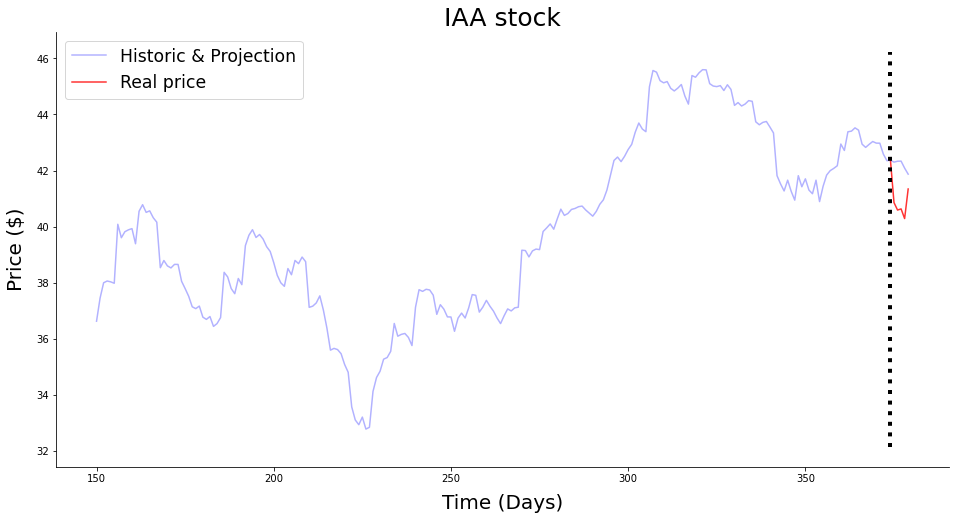

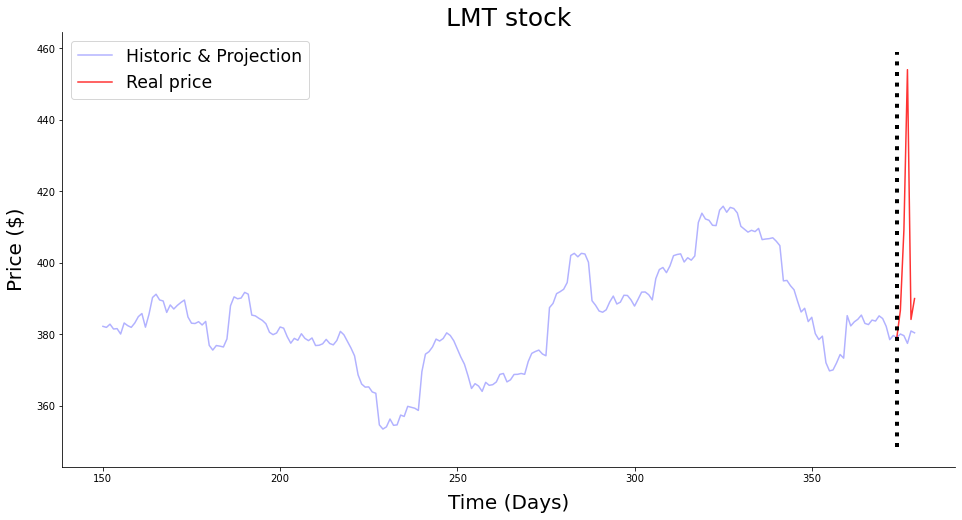

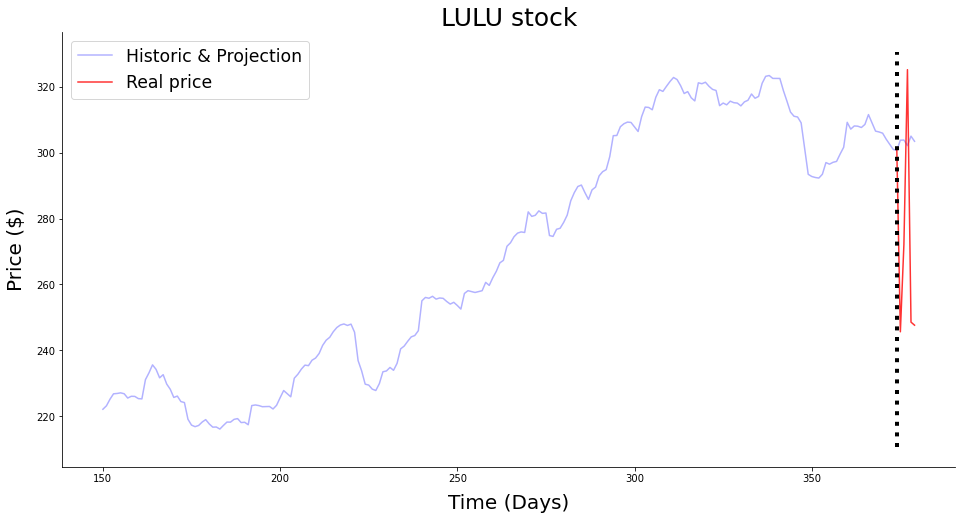

In [152]:
# populating prediction for all portfolio
my_stocks = r.build_holdings()
for key,value in my_stocks.items():
    predict_stock(key)